# **Sri Lanka Vehicle Prices Dataset**
<img src = 'https://www.thecoolector.com/wp-content/uploads/2018/10/charger-1050x700.jpg'>



## **Contents in this Data Analysis**

1.   Data Loading
2.   Data Cleaning
3.   EDA and Data Transformation
4.   Dashboard (Get Car of Your Own Choice using Filters)



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import timeit
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/vehicle_data.csv")
df.head()

,Title,Sub_title,Price,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity,Mileage,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Micro Panda Auto 2019 for sale,"Posted on 02 Jul 6:27 am, Kesbewa, Colombo","Rs 2,795,000",Micro,Panda,Auto,2019,Used,Automatic,Hatchback,Petrol,"1,000 cc","14,000 km","Kesbewa, Colombo",â¤ Auto Auto Autoâ¤ Micro Panda CBH-xxxx 201...,https://ikman.lk/en/ad/micro-panda-auto-2019-f...,Sarath,Member,2021-07-02 06:27:00
1,Toyota GT86 Company Maintained 2013 for sale,"Posted on 15 Jun 7:38 pm, Rajagiriya, Colombo","Rs 11,500,000",Toyota,GT86,Company Maintained,2013,Used,Automatic,CoupÃ©/Sports,Petrol,"2,000 cc","27,000 km","Rajagiriya, Colombo",Toyota Gt86 Company maintained2013 Manufacture...,https://ikman.lk/en/ad/toyota-gt86-company-mai...,D&D Auto Parts,Premium-Member,2021-06-15 19:38:00
2,"Toyota IST FL , GRADE 2003 for sale","Posted on 05 Jul 1:36 pm, Marawila, Puttalam","Rs 3,300,000",Toyota,IST,"FL , GRADE",2003,Used,Automatic,Hatchback,Petrol,"1,300 cc","150,000 km","Marawila, Puttalam",TOYOTA ISTFL GRADEKD ; >>>> NUMBERYOM 2003RAGE...,https://ikman.lk/en/ad/toyota-ist-fl-grade-200...,Bihan Enterprises,Premium-Member,2021-07-05 13:36:00
3,Toyota Allion 240 2002 for sale,"Posted on 05 Jul 1:33 pm, Peradeniya, Kandy","Rs 4,450,000",Toyota,Allion,240,2002,Used,Automatic,Saloon,Petrol,"1,500 cc","124,000 km","Peradeniya, Kandy",Toyota Allion 240CP KA-4xxxManufactured 2002Re...,https://ikman.lk/en/ad/toyota-allion-240-2002-...,Free Bird Media (Pvt) Ltd,Member,2021-07-05 13:33:00
4,Micro Panda LC 1.0 2015 for sale,"Posted on 05 Jul 1:30 pm, Veyangoda, Gampaha","Rs 2,173,000",Micro,Panda,LC 1.0,2015,Used,Manual,Hatchback,Petrol,"1,000 cc","15,800 km","Veyangoda, Gampaha","CAJ XXXX ,Silver colour ,1st Owner , Full Opti...",https://ikman.lk/en/ad/micro-panda-lc-10-2015-...,Harsha Anuradhi,Member,2021-07-05 13:30:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16309 entries, 0 to 16308
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           16309 non-null  object
 1   Sub_title       16309 non-null  object
 2   Price           16309 non-null  object
 3   Brand           16309 non-null  object
 4   Model           16309 non-null  object
 5   Edition         11886 non-null  object
 6   Year            16309 non-null  int64 
 7   Condition       16309 non-null  object
 8   Transmission    16309 non-null  object
 9   Body            14597 non-null  object
 10  Fuel            16309 non-null  object
 11  Capacity        16309 non-null  object
 12  Mileage         16309 non-null  object
 13  Location        16309 non-null  object
 14  Description     16309 non-null  object
 15  Post_URL        16309 non-null  object
 16  Seller_name     16309 non-null  object
 17  Seller_type     16309 non-null  object
 18  publis

In [ ]:
#Data Transformation Needed to Convert Object Columns into Numerical Columns
%timeit df['Price'] = df['Price'].str.replace("Rs","")
%timeit df['Price'] = df['Price'].apply(lambda a: str(a).replace("Rs",""))

100 loops, best of 5: 10.2 ms per loop
100 loops, best of 5: 6.63 ms per loop


In [ ]:
#For Price Column
df['Price'] = df['Price'].apply(lambda a: str(a).replace("Rs",""))
df['Price'] = df['Price'].apply(lambda a: str(a).replace(",",""))
df['Price'] = df['Price'].astype(float)

#For Capacity
df['Capacity'] = df['Capacity'].apply(lambda a: str(a).replace("cc",""))
df['Capacity'] = df['Capacity'].apply(lambda a: str(a).replace(",",""))
df['Capacity'] = df['Capacity'].astype(int)

#For Mileage
df['Mileage'] = df['Mileage'].apply(lambda a: str(a).replace("km",""))
df['Mileage'] = df['Mileage'].apply(lambda a: str(a).replace(",",""))
df['Mileage'] = df['Mileage'].astype(int)

#Cleaned Dataset with Renamed Column
df = df.rename(columns={'Price': 'Price_rs','Capacity': 'Capacity_cc','Mileage': 'Mileage_km'})
df.head()

,Title,Sub_title,Price_rs,Brand,Model,Edition,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Location,Description,Post_URL,Seller_name,Seller_type,published_date
0,Micro Panda Auto 2019 for sale,"Posted on 02 Jul 6:27 am, Kesbewa, Colombo",2795000.0,Micro,Panda,Auto,2019,Used,Automatic,Hatchback,Petrol,1000,14000,"Kesbewa, Colombo",â¤ Auto Auto Autoâ¤ Micro Panda CBH-xxxx 201...,https://ikman.lk/en/ad/micro-panda-auto-2019-f...,Sarath,Member,2021-07-02 06:27:00
1,Toyota GT86 Company Maintained 2013 for sale,"Posted on 15 Jun 7:38 pm, Rajagiriya, Colombo",11500000.0,Toyota,GT86,Company Maintained,2013,Used,Automatic,CoupÃ©/Sports,Petrol,2000,27000,"Rajagiriya, Colombo",Toyota Gt86 Company maintained2013 Manufacture...,https://ikman.lk/en/ad/toyota-gt86-company-mai...,D&D Auto Parts,Premium-Member,2021-06-15 19:38:00
2,"Toyota IST FL , GRADE 2003 for sale","Posted on 05 Jul 1:36 pm, Marawila, Puttalam",3300000.0,Toyota,IST,"FL , GRADE",2003,Used,Automatic,Hatchback,Petrol,1300,150000,"Marawila, Puttalam",TOYOTA ISTFL GRADEKD ; >>>> NUMBERYOM 2003RAGE...,https://ikman.lk/en/ad/toyota-ist-fl-grade-200...,Bihan Enterprises,Premium-Member,2021-07-05 13:36:00
3,Toyota Allion 240 2002 for sale,"Posted on 05 Jul 1:33 pm, Peradeniya, Kandy",4450000.0,Toyota,Allion,240,2002,Used,Automatic,Saloon,Petrol,1500,124000,"Peradeniya, Kandy",Toyota Allion 240CP KA-4xxxManufactured 2002Re...,https://ikman.lk/en/ad/toyota-allion-240-2002-...,Free Bird Media (Pvt) Ltd,Member,2021-07-05 13:33:00
4,Micro Panda LC 1.0 2015 for sale,"Posted on 05 Jul 1:30 pm, Veyangoda, Gampaha",2173000.0,Micro,Panda,LC 1.0,2015,Used,Manual,Hatchback,Petrol,1000,15800,"Veyangoda, Gampaha","CAJ XXXX ,Silver colour ,1st Owner , Full Opti...",https://ikman.lk/en/ad/micro-panda-lc-10-2015-...,Harsha Anuradhi,Member,2021-07-05 13:30:00


In [ ]:
df.describe()

,Price_rs,Year,Capacity_cc,Mileage_km
count,1.630900e+04,16309.000000,16309.000000,16309.000000
mean,6.250761e+06,2008.041388,1496.715188,94578.110062
std,8.316997e+06,11.400445,735.577866,75317.794862
min,9.900000e+02,1927.000000,1.000000,0.000000
25%,2.260000e+06,2003.000000,1000.000000,45000.000000
50%,3.950000e+06,2013.000000,1490.000000,81000.000000
75%,6.690000e+06,2016.000000,1800.000000,127323.000000
max,2.100000e+08,2021.000000,10000.000000,1000000.000000


In [ ]:
#Getting only those Columns that we need, so Drop that we don't need
data = df.drop(['Sub_title','Edition'],axis=1)

In [ ]:
data[['Brand','Model']]
data['Brand_Model'] = data['Brand'] + " " + data['Model']
data = data.drop(['Brand','Model'],axis=1)

In [ ]:
data.nunique()

Title              9220
Price_rs           1741
Year                 75
Condition             3
Transmission          4
Body                  7
Fuel                  6
Capacity_cc         413
Mileage_km         3488
Location            197
Description       15037
Post_URL          15757
Seller_name        5476
Seller_type           2
published_date    12940
Brand_Model         554
dtype: int64

In [ ]:
data.isna().sum()

Title                0
Price_rs             0
Year                 0
Condition            0
Transmission         0
Body              1712
Fuel                 0
Capacity_cc          0
Mileage_km           0
Location             0
Description          0
Post_URL             0
Seller_name          0
Seller_type          0
published_date       0
Brand_Model          0
dtype: int64

In [ ]:
#Dataset Cleaned for all nan Values and Replaced with MODE
data['Body'] = data['Body'].fillna(data['Body'].mode()[0])

In [ ]:
#Unique Values in all Categorical Variables
print(data['Brand_Model'].unique()) # We can build model that predict Top 10 Brand and Model on the Basis of Specifications Given 
print("*"*50)
print(data['Condition'].unique()) # Get to know the Price Distribution in different conditions and impact on Price
print("*"*50)
print(data['Transmission'].unique()) # Get to know which Transmission is used more and Why and impact on Price
print("*"*50)
print(data['Body'].unique()) # Get to know how Body Type impact on Price and which body type is used latest and which is old
print("*"*50)
print(data['Fuel'].unique()) # Which Fuel gives more mileage
print("*"*50)
print(data['Seller_name'].unique()) # which seller is most successfull or having more cars
print("*"*50)
print(data['Seller_type'].unique()) # We can build that predicts what Seller Membership is given to Seller on the basis of this Data

['Micro Panda' 'Toyota GT86' 'Toyota IST' 'Toyota Allion' 'Honda Vezel'
 'Toyota Premio' 'Nissan Juke' 'Mercedes Benz C180' 'Toyota Raize'
 'Mitsubishi Montero' 'Mini Cooper' 'Nissan Navara' 'Toyota Hilux'
 'Toyota CHR' 'Daihatsu Thor' 'Ford Laser' 'Honda CRV' 'Kia Sorento'
 'Suzuki Wagon R Stingray' 'Toyota Land Cruiser Prado' 'Suzuki Hustler'
 'Chery Tiggo' 'Mercedes Benz E350' 'Nissan Sunny' 'Toyota Avanza'
 'Suzuki Alto' 'Daihatsu Mira' 'Daihatsu Charade' 'Suzuki Swift'
 'BMW 520d' 'Kia Picanto' 'Nissan Sylphy' 'Land Rover Defender'
 'Toyota Corolla' 'Honda Civic' 'Morris Minor' 'Chevrolet Aveo'
 'Toyota Aqua' 'Mitsubishi Lancer' 'Datsun Redi Go' 'Suzuki Maruti'
 'Toyota Vitz' 'Suzuki Escudo' 'Mitsubishi Mirage' 'Mazda Familia'
 'Honda Fit' 'Toyota Harrier' 'Toyota Tank' 'Toyota Axio'
 'Mercedes Benz E200' 'Honda Insight' 'Nissan Bluebird' 'Toyota Crown'
 'Mercedes Benz CLA 200' 'Hyundai Elantra' 'Suzuki Spacia' 'Renault KWID'
 'Audi Q3' 'Hyundai Santa Fe' 'Maruti Suzuki Alto' 'Suz

In [ ]:
data.columns

Index(['Title', 'Price_rs', 'Year', 'Condition', 'Transmission', 'Body',
       'Fuel', 'Capacity_cc', 'Mileage_km', 'Location', 'Description',
       'Post_URL', 'Seller_name', 'Seller_type', 'published_date',
       'Brand_Model'],
      dtype='object')

In [ ]:
final = data[['Price_rs', 'Year', 'Condition', 'Transmission', 'Body',
       'Fuel', 'Capacity_cc', 'Mileage_km']]
final.head()

,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km
0,2795000.0,2019,Used,Automatic,Hatchback,Petrol,1000,14000
1,11500000.0,2013,Used,Automatic,CoupÃ©/Sports,Petrol,2000,27000
2,3300000.0,2003,Used,Automatic,Hatchback,Petrol,1300,150000
3,4450000.0,2002,Used,Automatic,Saloon,Petrol,1500,124000
4,2173000.0,2015,Used,Manual,Hatchback,Petrol,1000,15800


In [ ]:
final['Year_old'] = 2021 - final['Year']
final.head()

,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Year_old
0,2795000.0,2019,Used,Automatic,Hatchback,Petrol,1000,14000,2
1,11500000.0,2013,Used,Automatic,CoupÃ©/Sports,Petrol,2000,27000,8
2,3300000.0,2003,Used,Automatic,Hatchback,Petrol,1300,150000,18
3,4450000.0,2002,Used,Automatic,Saloon,Petrol,1500,124000,19
4,2173000.0,2015,Used,Manual,Hatchback,Petrol,1000,15800,6


In [ ]:
final.drop(['Year'],axis =1, inplace=True)

In [ ]:
final.head()

,Price_rs,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Year_old
0,2795000.0,Used,Automatic,Hatchback,Petrol,1000,14000,2
1,11500000.0,Used,Automatic,CoupÃ©/Sports,Petrol,2000,27000,8
2,3300000.0,Used,Automatic,Hatchback,Petrol,1300,150000,18
3,4450000.0,Used,Automatic,Saloon,Petrol,1500,124000,19
4,2173000.0,Used,Manual,Hatchback,Petrol,1000,15800,6


In [ ]:
final=pd.get_dummies(final,drop_first=True)

In [ ]:
final.head()

,Price_rs,Capacity_cc,Mileage_km,Year_old,Condition_Reconditioned,Condition_Used,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Body_CoupÃ©/Sports,Body_Hatchback,Body_MPV,Body_SUV / 4x4,Body_Saloon,Body_Station wagon,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other fuel type,Fuel_Petrol
0,2795000.0,1000,14000,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,11500000.0,2000,27000,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,3300000.0,1300,150000,18,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,4450000.0,1500,124000,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2173000.0,1000,15800,6,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
final.corr()

,Price_rs,Capacity_cc,Mileage_km,Year_old,Condition_Reconditioned,Condition_Used,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Body_CoupÃ©/Sports,Body_Hatchback,Body_MPV,Body_SUV / 4x4,Body_Saloon,Body_Station wagon,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other fuel type,Fuel_Petrol
Price_rs,1.000000,0.468558,-0.259469,-0.346463,0.068313,-0.158325,-0.331150,0.011998,0.270569,0.031828,-0.252533,0.044394,0.413490,-0.064831,-0.048981,0.231461,-0.016201,0.002776,0.013971,-0.182338
Capacity_cc,0.468558,1.000000,0.186945,0.096793,-0.080711,0.059552,-0.101065,-0.003871,0.203133,-0.011154,-0.496722,0.008243,0.543546,0.089697,0.000341,0.530195,-0.117448,-0.056231,-0.002503,-0.354275
Mileage_km,-0.259469,0.186945,1.000000,0.520373,-0.172272,0.227620,0.263186,-0.005306,-0.112357,-0.033233,-0.211244,-0.029634,0.003146,0.201261,0.099355,0.167974,-0.029393,-0.098847,-0.008209,-0.053039
Year_old,-0.346463,0.096793,0.520373,1.000000,-0.127722,0.170976,0.525863,0.015888,-0.146098,0.025205,-0.240072,-0.044759,-0.111730,0.288704,0.152187,0.085320,-0.042088,-0.213676,-0.012666,0.098327
Condition_Reconditioned,0.068313,-0.080711,-0.172272,-0.127722,1.000000,-0.813153,-0.109701,0.010705,0.008563,0.033637,0.065085,0.035097,-0.025454,-0.061869,-0.017906,-0.035734,-0.000682,-0.024888,-0.005095,0.047070
Condition_Used,-0.158325,0.059552,0.227620,0.170976,-0.813153,1.000000,0.131665,-0.007135,-0.081469,-0.029788,-0.041874,-0.079967,-0.011487,0.073333,0.023885,0.021497,-0.001149,0.037386,0.006266,-0.044838
Transmission_Manual,-0.331150,-0.101065,0.263186,0.525863,-0.109701,0.131665,1.000000,-0.016056,-0.189520,0.018658,0.020635,-0.014767,-0.117917,0.037265,0.081999,0.063776,-0.053670,-0.249744,-0.014635,0.143711
Transmission_Other transmission,0.011998,-0.003871,-0.005306,0.015888,0.010705,-0.007135,-0.016056,1.000000,-0.006517,-0.002279,-0.006159,-0.002468,0.009679,0.002253,-0.005166,-0.002012,-0.001846,-0.000539,0.091849,-0.003511
Transmission_Tiptronic,0.270569,0.203133,-0.112357,-0.146098,0.008563,-0.081469,-0.189520,-0.006517,1.000000,0.035040,-0.157350,0.046481,0.181509,0.007523,-0.023519,0.099116,-0.012636,-0.004478,0.017474,-0.074621
Body_CoupÃ©/Sports,0.031828,-0.011154,-0.033233,0.025205,0.033637,-0.029788,0.018658,-0.002279,0.035040,1.000000,-0.090251,-0.010189,-0.044880,-0.061964,-0.021325,-0.028277,-0.007618,-0.013850,0.019871,0.031172


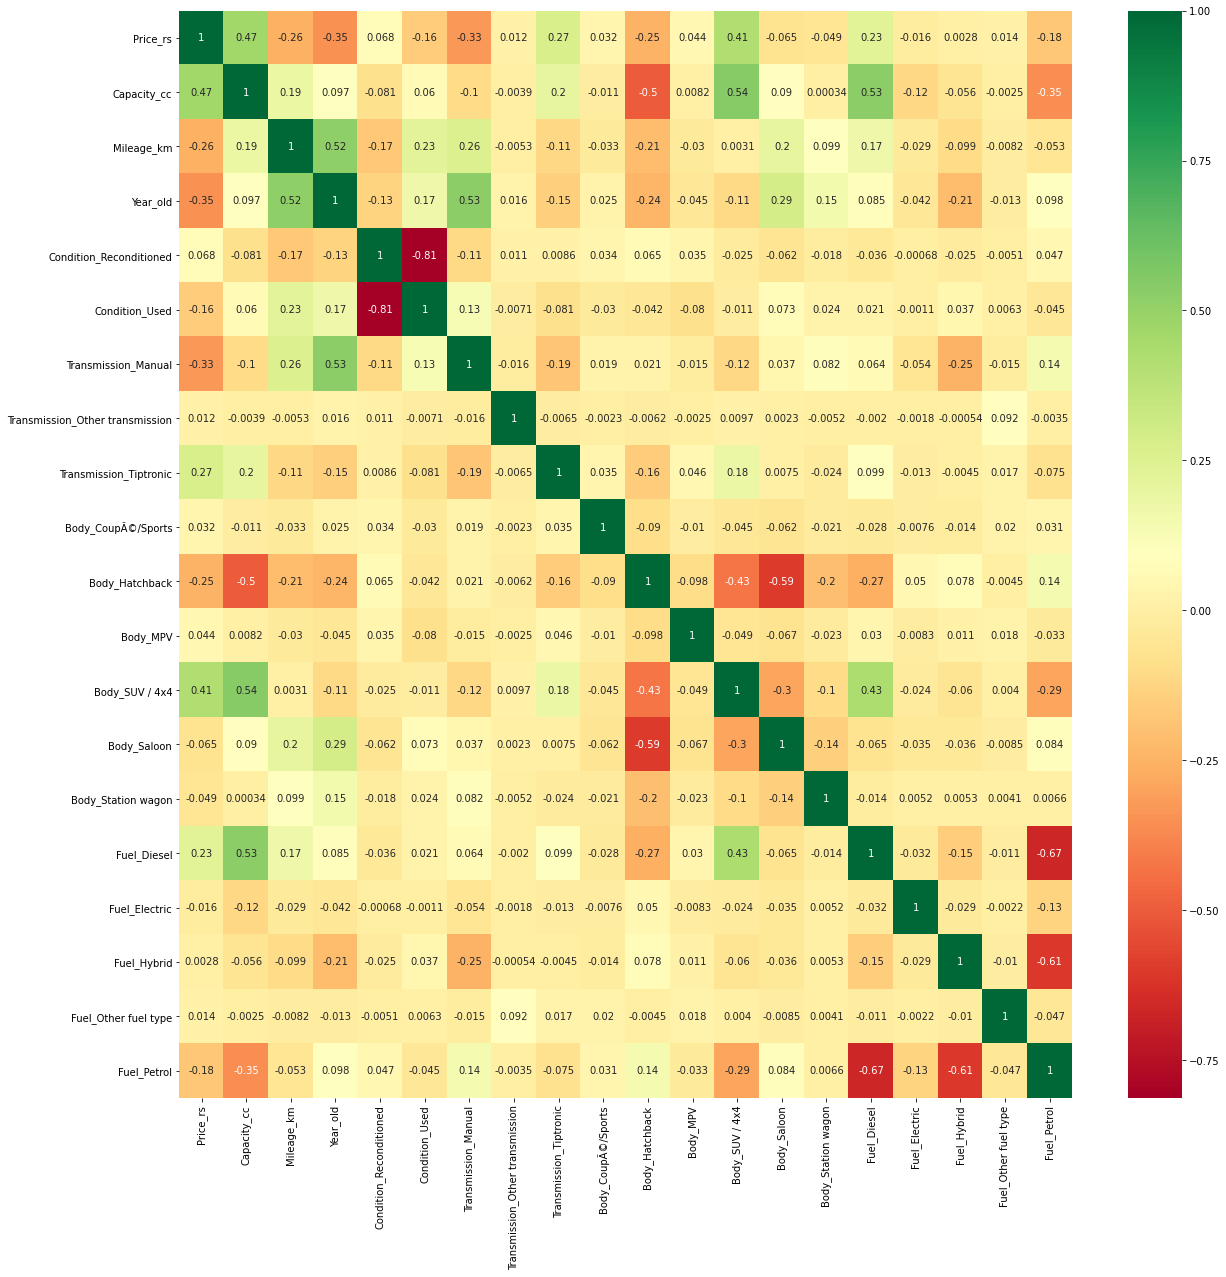

In [ ]:
#get correlations of each features in dataset
corrmat = final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
X=final.iloc[:,1:]
y=final.iloc[:,0]

In [ ]:
X.head()

,Capacity_cc,Mileage_km,Year_old,Condition_Reconditioned,Condition_Used,Transmission_Manual,Transmission_Other transmission,Transmission_Tiptronic,Body_CoupÃ©/Sports,Body_Hatchback,Body_MPV,Body_SUV / 4x4,Body_Saloon,Body_Station wagon,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Other fuel type,Fuel_Petrol
0,1000,14000,2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,2000,27000,8,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1300,150000,18,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1500,124000,19,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1000,15800,6,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
y.head()

0     2795000.0
1    11500000.0
2     3300000.0
3     4450000.0
4     2173000.0
Name: Price_rs, dtype: float64

In [ ]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

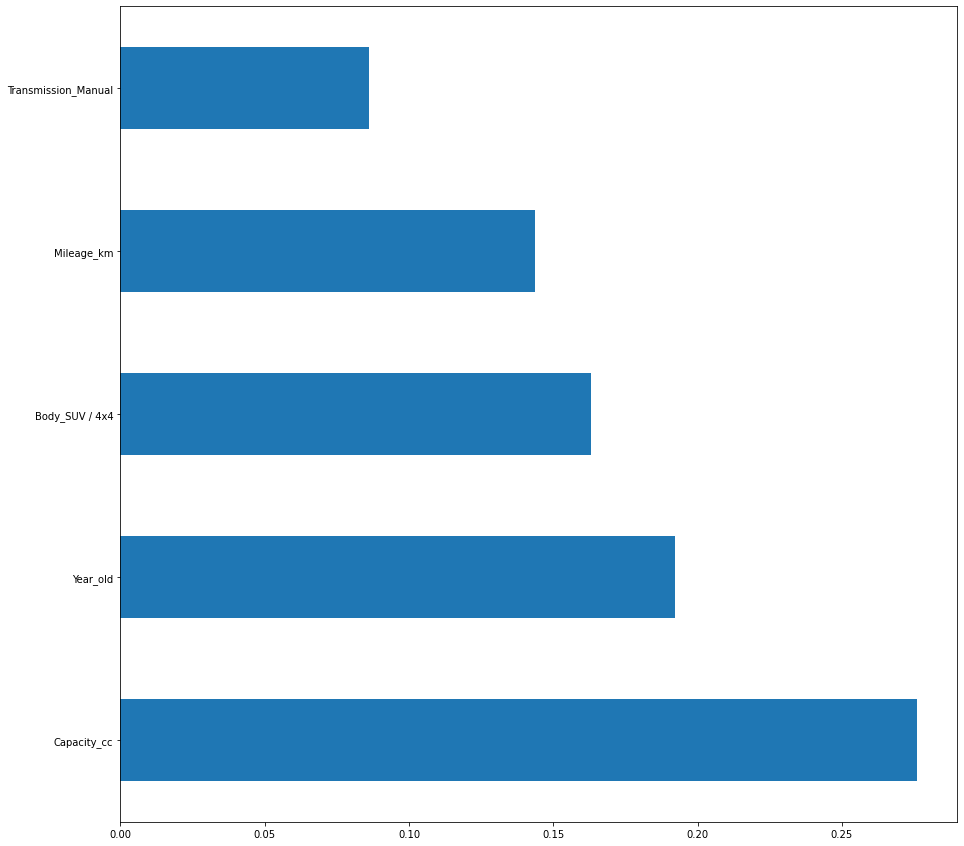

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:

from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor=RandomForestRegressor()

In [ ]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.7s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_score_

-14813148417506.176

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



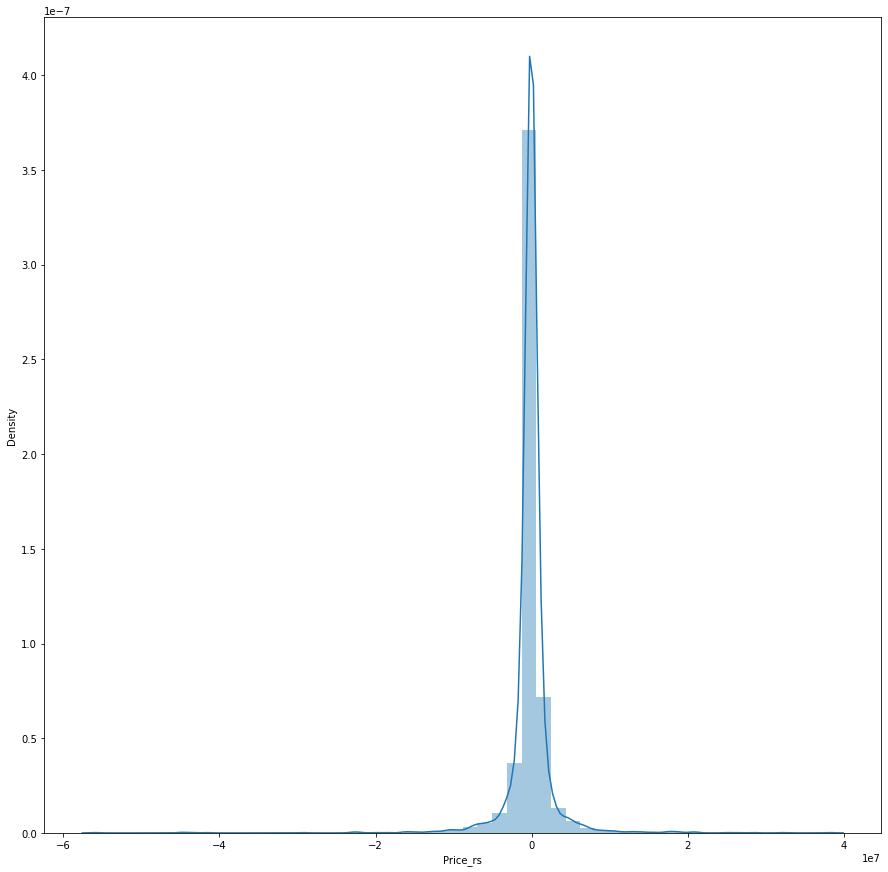

In [ ]:
sns.distplot(y_test-predictions)

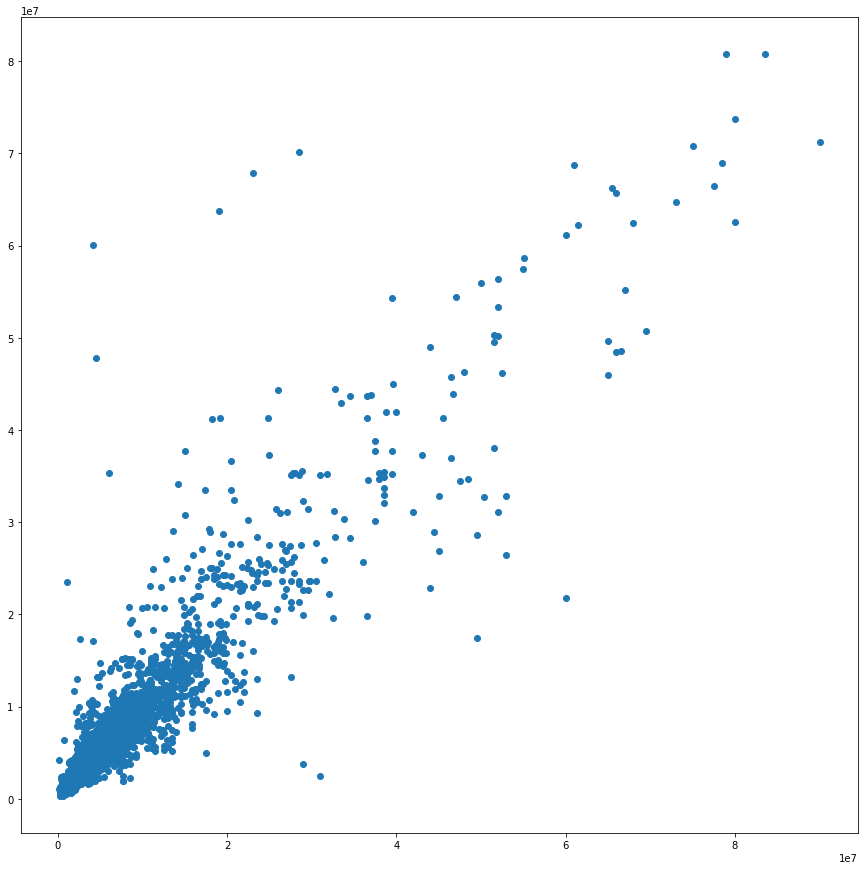

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1195306.3772047765
MSE: 9166083477149.836
RMSE: 3027554.041986672


In [ ]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

#1. **Car BRAND MODEL Prediction**

In [ ]:
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
car = data[['Brand_Model','Price_rs','Year','Condition','Transmission','Body','Fuel','Capacity_cc','Mileage_km','Seller_name','Seller_type']]

In [ ]:
car['serial'] = car.index
car = car[['serial','Brand_Model','Price_rs','Year','Condition','Transmission','Body','Fuel','Capacity_cc','Mileage_km','Seller_name','Seller_type']]
car.head(1)

,serial,Brand_Model,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Seller_name,Seller_type
0,0,Micro Panda,2795000.0,2019,Used,Automatic,Hatchback,Petrol,1000,14000,Sarath,Member


In [ ]:
car['Year'] = pd.to_datetime(car['Year'].astype(str)).values
car.head(1)

,serial,Brand_Model,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Seller_name,Seller_type
0,0,Micro Panda,2795000.0,2019-01-01,Used,Automatic,Hatchback,Petrol,1000,14000,Sarath,Member


In [ ]:
#Getting count of Used, New and Re-Conditioned Cars
print("New Cars :",len(car[car['Condition'] == 'New']))
print("Reconditioned Cars :",len(car[car['Condition'] == 'Reconditioned']))
print("Used Cars :",len(car[car['Condition'] == 'Used']))

New Cars : 251
Reconditioned Cars : 514
Used Cars : 15544


In [ ]:
#Price of Cars Brand Model Scatter Plot with Conditions
fig1 = px.scatter(car, x=car['Brand_Model'], y=car['Price_rs'], size='Price_rs',color='Condition')
fig1

In [ ]:
def carPriceData(data):
    rating = data.groupby(['Price_rs', 'Brand_Model','Condition']).agg({'serial': 'count'}).reset_index()
    rating = rating[rating['serial'] != 0]
    rating.columns = ['Price_rs', 'Brand_Model', 'Condition','count']
    rating = rating.sort_values('Price_rs',ascending=False)
    return rating

In [ ]:
carPrice = carPriceData(car)
fig = px.bar(carPrice[:20], x='Brand_Model', y='Price_rs', color='Condition')
fig.show()

In [ ]:
def carConditionData(data):
    rating = data.groupby(['Brand_Model', 'Condition','Transmission']).agg({'serial': 'count'}).reset_index()
    rating = rating[rating['serial'] != 0]
    rating.columns = ['Brand_Model', 'Condition','Transmission','count']
    rating = rating.sort_values('count',ascending=False)
    return rating

car_new = car[car['Condition'] == 'New']
car_re = car[car['Condition'] == 'Reconditioned']
car_use = car[car['Condition'] == 'Used']

car_newdf = carConditionData(car_new)
car_redf = carConditionData(car_re)
car_usedf = carConditionData(car_use)

In [ ]:
  fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]])

  fig.add_trace(
      go.Pie(labels=car_newdf['Transmission'], values=car_newdf['count']),
      row=1, col=1
  )

  fig.add_trace(
      go.Pie(labels=car_redf['Transmission'], values=car_redf['count']),
      row=1, col=2
  )

  fig.add_trace(
      go.Pie(labels=car_usedf['Transmission'], values=car_usedf['count']),
      row=1, col=3
  )

  fig.update_traces(textposition='outside', hole=.4, hoverinfo="label+percent")
  fig.update_layout(
      title_text="Transmission in Each Conditioned DataFrame",
      # Add annotations in the center of the donut pies.
      annotations=[dict(text='New', x=0.13, y=0.5, font_size=12, showarrow=False),
                  dict(text='Reconditioned', x=0.50, y=0.5, font_size=12, showarrow=False),
                  dict(text='Used', x=0.87, y=0.5, font_size=12, showarrow=False)])
  fig.show()

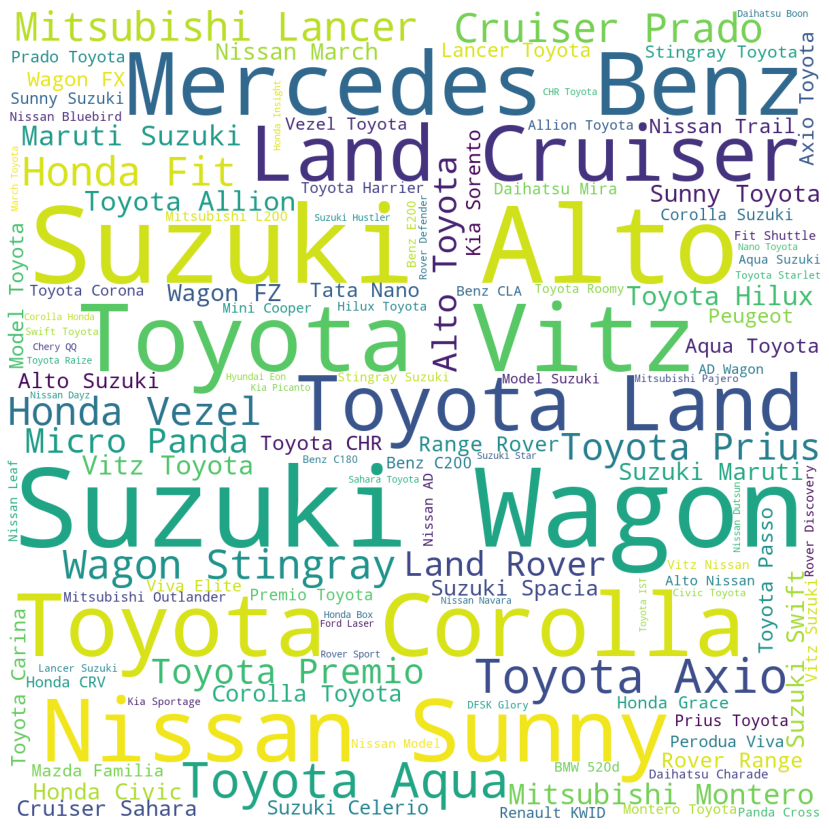

In [ ]:
#WordCloud of Brand_Models to See which has more impact
from wordcloud import WordCloud

text = str(list(car['Brand_Model'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [ ]:
def carSelect(carModel,seller):
  selected = car[car['Brand_Model'] == carModel]
  selected = selected[selected['Seller_type'] == seller]
  selected = selected.sort_values(by=['Mileage_km'], ascending=False)
  return selected

In [ ]:
carSelected = carSelect('Land Rover Range Rover','Member')
carSelected.head(5)

,serial,Brand_Model,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Seller_name,Seller_type
4650,4650,Land Rover Range Rover,3100000.0,1967-01-01,Used,Manual,SUV / 4x4,Diesel,2052,150000,Ashan Nanayakkara,Member
10821,10821,Land Rover Range Rover,11000000.0,2003-01-01,Used,Automatic,SUV / 4x4,Petrol,4400,143000,Sellfast | Uhumeeya | Gepallawa Ads,Member
5848,5848,Land Rover Range Rover,10450000.0,2013-01-01,Used,Automatic,SUV / 4x4,Diesel,2200,103000,T I Auto Arcade,Member
13027,13027,Land Rover Range Rover,6450000.0,1994-01-01,Used,Manual,SUV / 4x4,Petrol,3900,88000,Akalanka Enterprises,Member
2262,2262,Land Rover Range Rover,17000000.0,2008-01-01,Used,Automatic,SUV / 4x4,Petrol,4200,82000,Campion Senanayake,Member


In [ ]:
fig = px.histogram(carSelected, x='Mileage_km', y='Brand_Model', color='Condition')
fig.show()

In [ ]:
car.head(1)

,serial,Brand_Model,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Seller_name,Seller_type
0,0,Micro Panda,2795000.0,2019-01-01,Used,Automatic,Hatchback,Petrol,1000,14000,Sarath,Member


In [ ]:
#best_seller
data_seller = car[['Price_rs','Seller_name']].groupby('Seller_name').sum()

In [ ]:
data_seller = pd.DataFrame(data_seller.to_records()) # Multi index to Single Index

In [ ]:
data_seller = data_seller.sort_values(by=['Price_rs'], ascending=False)

In [ ]:
data_seller = data_seller[:10]
data_seller

,Seller_name,Price_rs
2788,R.A Lanka Motors,2.800470e+09
1157,Gayuki Holdings (Pvt) Ltd,2.478820e+09
1825,LB Finance PLC,2.352295e+09
1826,LB Finance Plc,2.287155e+09
435,Benson Motors,1.938490e+09
1422,Irahanda Trading,1.601450e+09
4010,Tele Ads,1.501864e+09
3956,Suren Auto Mart,1.249825e+09
2766,Punchi Car Niwasa,1.146984e+09
2350,Nandana Enterprises,9.423600e+08


In [ ]:
px.bar(data_seller,x = data_seller['Seller_name'], y=data_seller['Price_rs'],color='Price_rs')

## **Get to know the Price Distribution in different conditions and impact on Price**

In [ ]:
data.head(1)

,Title,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Brand_Model
0,Micro Panda Auto 2019 for sale,2795000.0,2019,Used,Automatic,Hatchback,Petrol,1000,14000,"Kesbewa, Colombo",â¤ Auto Auto Autoâ¤ Micro Panda CBH-xxxx 201...,https://ikman.lk/en/ad/micro-panda-auto-2019-f...,Sarath,Member,2021-07-02 06:27:00,Micro Panda


In [ ]:
cond = data[['Brand_Model','Price_rs','Year','Condition','Mileage_km']]

In [ ]:
cond.head(1)

,Brand_Model,Price_rs,Year,Condition,Mileage_km
0,Micro Panda,2795000.0,2019,Used,14000


In [ ]:
def conditionPriceCompare(model):
  result = []
  #New
  data_new = cond[(cond['Brand_Model'] == model) & (car['Condition'] == 'New')]
  data_new = data_new.sort_values(by='Mileage_km',ascending=False)
  if len(data_new) > 0:
    result.append(data_new[:1].values[0])
  else:
    print("Car in this Condition Not Available")
    result.append([model, 0, 0, 'New', 0])
  #Reconditioned 
  data_recond = cond[(cond['Brand_Model'] == model) & (car['Condition'] == 'Reconditioned')]
  data_recond = data_recond.sort_values(by='Mileage_km',ascending=False)
  if len(data_recond) > 0:
    result.append(data_recond[:1].values[0])
  else:
    print("Car in this Condition Not Available")
    result.append([model, 0, 0, 'Reconditioned', 0])
  #Used
  data_used = cond[(cond['Brand_Model'] == model) & (car['Condition'] == 'Used')]
  data_used = data_used.sort_values(by='Mileage_km',ascending=False)
  if len(data_used) > 0:
    result.append(data_used[:1].values[0])
  else:
    print("Car in this Condition Not Available")
    result.append([model, 0, 0, 'Used', 0])
  
  return result

In [ ]:
res = conditionPriceCompare('Nissan Dayz')
df_cond = pd.DataFrame(res,columns =['Brand_Model', 'Price_rs','Year','Condition','Mileage_km'])
df_cond

Car in this Condition Not Available


,Brand_Model,Price_rs,Year,Condition,Mileage_km
0,Nissan Dayz,0.0,0,New,0
1,Nissan Dayz,4500000.0,2016,Reconditioned,15000
2,Nissan Dayz,2245000.0,2000,Used,100000


In [ ]:
px.bar(df_cond,x = df_cond['Mileage_km'], y=df_cond['Price_rs'],color='Condition')

In [ ]:
car.head(1)

,serial,Brand_Model,Price_rs,Year,Condition,Transmission,Body,Fuel,Capacity_cc,Mileage_km,Seller_name,Seller_type
0,0,Micro Panda,2795000.0,2019-01-01,Used,Automatic,Hatchback,Petrol,1000,14000,Sarath,Member


In [ ]:
#Which Seller has Most New, Used and Reconditioned Car
new = car[car['Condition'] == 'New']
new_2 = new[['Condition','Seller_name']].groupby('Seller_name').count()
new_2 = pd.DataFrame(new_2.to_records())
new_cars_seller = new_2.sort_values(by='Condition',ascending=False).values[:5]
newdf = pd.DataFrame(new_cars_seller,columns = ['Seller_name','Count'])
newdf['Condition'] = 'New'
newdf

,Seller_name,Count,Condition
0,Irahanda Trading,53,New
1,LB Finance Plc,27,New
2,LB Finance PLC,20,New
3,Dushan Enterprise,9,New
4,Kangone Motor Traders,7,New


In [ ]:
old = car[car['Condition'] == 'Used']
old_2 = old[['Condition','Seller_name']].groupby('Seller_name').count()
old_2 = pd.DataFrame(old_2.to_records())
old_cars_seller = old_2.sort_values(by='Condition',ascending=False).values[:5]
olddf = pd.DataFrame(old_cars_seller,columns = ['Seller_name','Count'])
olddf['Condition'] = 'Used'
olddf

,Seller_name,Count,Condition
0,LB Finance PLC,480,Used
1,Punchi Car Niwasa,346,Used
2,LB Finance Plc,250,Used
3,Tele Ads,235,Used
4,Nandana Enterprises,114,Used


In [ ]:
recon = car[car['Condition'] == 'Reconditioned']
recon = recon[['Condition','Seller_name']].groupby('Seller_name').count()
recon = pd.DataFrame(recon.to_records())
recon_cars_seller = recon.sort_values(by='Condition',ascending=False).values[:5]
recondf = pd.DataFrame(recon_cars_seller,columns = ['Seller_name','Count'])
recondf['Condition'] = 'Reconditioned'
recondf

,Seller_name,Count,Condition
0,Gayuki Holdings (Pvt) Ltd,109,Reconditioned
1,Dushan Enterprise,75,Reconditioned
2,Dammika Motor Traders (Pvt) Ltd,46,Reconditioned
3,Ruvisha Motor Traders,33,Reconditioned
4,MAC Enterprises,24,Reconditioned


In [ ]:
seller_con = pd.concat([newdf, olddf,recondf]).reset_index(drop=True)
seller_con.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Seller_name  15 non-null     object
 1   Count        15 non-null     object
 2   Condition    15 non-null     object
dtypes: object(3)
memory usage: 488.0+ bytes


In [ ]:
seller_con['Count'] = seller_con['Count'].astype(int)

In [ ]:
px.bar(seller_con, x=seller_con['Seller_name'], y=seller_con['Count'],color='Condition')

In [ ]:
tran = data[['Brand_Model','Condition','Transmission','Body','Mileage_km','Price_rs']]
tran.head(1)

,Brand_Model,Condition,Transmission,Body,Mileage_km,Price_rs
0,Micro Panda,Used,Automatic,Hatchback,14000,2795000.0


In [ ]:
def TranModel(trantype, bodytype):
    data_new = tran[(tran['Transmission'] == trantype) & (tran['Body'] == bodytype)]
    data_new = data_new.sort_values(by='Mileage_km',ascending=False)
    return data_new

In [ ]:
t = TranModel('Automatic','Hatchback')
t = t[:10]

In [ ]:
px.bar(t, x=t['Brand_Model'], y=t['Price_rs'],color='Condition')

In [ ]:
px.histogram(tran, x=tran['Transmission'],color='Condition')

In [ ]:
px.histogram(tran, x=tran['Body'],color='Condition')